In [ ]:
import re
import nltk
import yellowbrick as yellowbrick
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from collections import Counter
from scipy.sparse import csr_matrix
from gensim.models import Word2Vec
import pandas as pd
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score as acc
from umap import UMAP
import hdbscan
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics.cluster import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers


##Installation des modules

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
pip install spacy

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 28.0 MB/s 
     |████████████████████████████████| 596 kB 37.0 MB/s 
     |████████████████████████████████| 61 kB 446 kB/s 
     |████████████████████████████████| 895 kB 35.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 31.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=99853da730531673dc75638dfda2b1fe06c6ebb589309fa35fcd609b7a21dff8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=ccefb8e8c5213055b4aab6b14e39653976f21846a2c4140ee95a7e882f1245c6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311861 sha256=b87fd64c2b0eae4993553ee822c5186241d794e177fb0deeb8dd48c15ce40e2b
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


##importation des dataset

In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving nlp_dataset_Articles_1.csv to nlp_dataset_Articles_1.csv


In [ ]:
df_article1 = pd.read_csv("nlp_dataset_Articles_1.csv",delimiter=';')

In [ ]:
df_article1 = df_article1.drop(columns ='Unnamed: 0')	
df_article1

,text
0,Eli Manning remains the New York Giants' quart...
1,Just an extra hour of exercise a week could si...
2,AP - The Boston Red Sox are to send hobbled st...
3,BASEBALL Arizona (NL): Named Bob Gebhard assis...
4,"CFHT -- Twenty-five years ago, on September 28..."
...,...
3980,"GEORGE TOWN, Cayman Islands - A strengthened H..."
3981,"Find.com, a business search engine (www.find.c..."
3982,If you #39;ve followed Arkansas football for t...
3983,Loren Woods had 17 points and a career-high 14...


##<h3> Nettoyage et tokenization du texte </h3>

In [ ]:
def clean_abstract(abs):
  wn = WordNetLemmatizer()
  txt = re.sub(r'[^\w\s]', '', abs)
  txt = re.sub(r'[0-9]', '', txt)
  txt = txt.split()
  txt = [word for word in txt if word not in set(stopwords.words('english')) ]
  txt = [word for word in txt if len(word) > 3 ]
  txt = [wn.lemmatize(word) for word in txt]

  return txt


In [ ]:
df_article1['clean_text_tokenized'] = df_article1['text'].apply(lambda x: clean_abstract(x))
df_article1['clean_text_full'] = df_article1['clean_text_tokenized'].apply(lambda x: " ".join(x))
df_article1

,text,clean_text_tokenized,clean_text_full
0,Eli Manning remains the New York Giants' quart...,"[Manning, remains, York, Giants, quarterback, ...",Manning remains York Giants quarterback future...
1,Just an extra hour of exercise a week could si...,"[Just, extra, hour, exercise, week, could, sig...",Just extra hour exercise week could significan...
2,AP - The Boston Red Sox are to send hobbled st...,"[Boston, send, hobbled, star, Curt, Schilling,...",Boston send hobbled star Curt Schilling mound ...
3,BASEBALL Arizona (NL): Named Bob Gebhard assis...,"[BASEBALL, Arizona, Named, Gebhard, assistant,...",BASEBALL Arizona Named Gebhard assistant gener...
4,"CFHT -- Twenty-five years ago, on September 28...","[CFHT, Twentyfive, year, September, CanadaFran...",CFHT Twentyfive year September CanadaFranceHaw...
...,...,...,...
3980,"GEORGE TOWN, Cayman Islands - A strengthened H...","[GEORGE, TOWN, Cayman, Islands, strengthened, ...",GEORGE TOWN Cayman Islands strengthened Hurric...
3981,"Find.com, a business search engine (www.find.c...","[Findcom, business, search, engine, wwwfindcom...",Findcom business search engine wwwfindcom toda...
3982,If you #39;ve followed Arkansas football for t...,"[followed, Arkansas, football, last, four, yea...",followed Arkansas football last four year know...
3983,Loren Woods had 17 points and a career-high 14...,"[Loren, Woods, point, careerhigh, rebound, Vin...",Loren Woods point careerhigh rebound Vince Car...


##Code pour l'affichage les plots

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
def eval_clustering_2D_nlp(x_reduced,pred_pca_labels):
    get_number_cluster(pred_pca_labels)

    plt.subplots(1, 1, figsize=(14, 6))
    plt.scatter(x_reduced[:,0], x_reduced[ :,1], c =pred_pca_labels, cmap = "gist_rainbow")
    # ax[1].scatter(x_reduced[ :,0], x_reduced[  :,1], c=pred_pca_labels, cmap = "gist_rainbow")
    # ax[1].set_title(' predicted visualization')
    # nmi1 = normalized_mutual_info_score(labels,pred_pca_labels)
    # plt.suptitle(nmi1)

In [ ]:
def eval_clustering_2D(x_reduced,pred_pca_labels,labels):
    nmi_ari(labels,pred_pca_labels) 
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(x_reduced[:,0], x_reduced[ :,1], c =labels, cmap = "gist_rainbow")
    ax[0].set_title('True ')
    ax[1].scatter(x_reduced[ :,0], x_reduced[  :,1], c=pred_pca_labels, cmap = "gist_rainbow")
    ax[1].set_title('Predicted')
    plt.suptitle("nmi1")

In [ ]:
# on va faire un minmax car c'est ce qui est conseillé par la literature (à tester sans)
def autoencoder_matrix(X):
  X_scaled = MinMaxScaler().fit_transform(X)
  input_layer = Input(shape =(X.shape[1], ))
  encoded = Dense(100, activation ='tanh',
                  activity_regularizer = regularizers.l1(10e-5))(input_layer)
  encoded = Dense(50, activation ='tanh',
                  activity_regularizer = regularizers.l1(10e-5))(encoded)
  encoded = Dense(25, activation ='tanh',
                  activity_regularizer = regularizers.l1(10e-5))(encoded)
  encoded = Dense(12, activation ='tanh',
                  activity_regularizer = regularizers.l1(10e-5))(encoded)
  encoded = Dense(6, activation ='relu')(encoded)
  decoded = Dense(12, activation ='tanh')(encoded)
  decoded = Dense(25, activation ='tanh')(decoded)
  decoded = Dense(50, activation ='tanh')(decoded)
  decoded = Dense(100, activation ='tanh')(decoded)
  output_layer = Dense(X.shape[1], activation ='relu')(decoded)

  autoencoder = Model(input_layer, output_layer)
  autoencoder.compile(optimizer ="adadelta", loss ="mse")
  autoencoder.fit(X_scaled, X_scaled, 
                  batch_size = 16, epochs = 50, 
                  shuffle = True, validation_split = 0.20)

  hidden_representation = Sequential()
  hidden_representation.add(autoencoder.layers[0])
  hidden_representation.add(autoencoder.layers[1])
  hidden_representation.add(autoencoder.layers[2])
  hidden_representation.add(autoencoder.layers[3])
  hidden_representation.add(autoencoder.layers[4])

  return hidden_representation.predict(X_scaled)

In [ ]:
def reduction_dimension(data_presentation) :
  #PCA
  df_pca = PCA(n_components=2)
  df_pca.fit(data_presentation)
  df_pca_presentation = df_pca.transform(data_presentation)

  #TSNE
  df_tsne_presentation = TSNE(n_components = 2,learning_rate='auto').fit_transform(data_presentation)

  #UMAP
  df_umap_presentation =  UMAP(n_components = 2).fit_transform(data_presentation)

  #Autoencoders
  df_autoencoder_presentation = autoencoder_matrix(pd.DataFrame(data_presentation))

  return df_pca, df_pca_presentation , df_tsne_presentation , df_umap_presentation ,df_autoencoder_presentation 



In [ ]:
def clustering_on_reduced_data(data_reduced) : 
    #Kmeans  
    df_kmeans = KMeans( random_state=42).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering().fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def clustering_on_reduced_data__bbc(data_reduced) : 
    #Kmeans  
    df_kmeans = KMeans( random_state=42,n_clusters=5).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering(n_clusters=5).fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0,n_clusters=5).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def clustering_on_reduced_data__c4(data_reduced) : 
    #Kmeans  
    df_kmeans = KMeans( random_state=42,n_clusters=4).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering(n_clusters=4).fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0,n_clusters=4).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def nmi_ari(true_label,predicted_label) : 
  print("NMI = {}".format(nmi(true_label, predicted_label)))
  print("ARI = {}".format(ari(true_label, predicted_label)))

In [ ]:
def plot_reduced_data(data_reduced):
  plt.subplots(figsize=(14, 6))
  plt.scatter(data_reduced[:,0], data_reduced[ :,1])


In [ ]:
def plot_reduced_data_label(data_reduced,label):
  plt.subplots(figsize=(14, 6))
  plt.scatter(data_reduced[:,0], data_reduced[ :,1],c=label, cmap = "gist_rainbow")


In [ ]:
def get_number_cluster(t) :
  t = np.unique(t)
  print("Nombre de clusters prédit est :",len(t))
  print('\n')


##Word2vec transformation pour le dataset Article 1

###Transformatio Word2Vec

In [ ]:
def vectors_mean(model, tokenized_text):
  mean_vector = [0 for i in range(100)]
  for i in range(100):
    for j in range(len(tokenized_text)):
      mean_vector[i] += model.wv[tokenized_text[j]][i]
  return [x/len(tokenized_text) for x in mean_vector]

###Article1 Transformation

In [ ]:
bert_embeddings_article1 = Word2Vec(df_article1['clean_text_tokenized'], min_count=0)

In [ ]:
article1_bert_representation =  [vectors_mean(bert_embeddings_article1, x) for x in df_article1['clean_text_tokenized']]


In [ ]:
article1_bert_representation = pd.DataFrame(article1_bert_representation)


<h2> Elbow </h2>

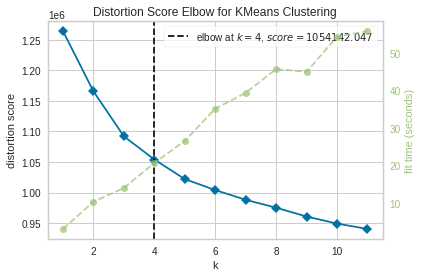

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(article1_bert_representation)        # Fit the data to the visualizer
visualizer.show() 

###<h2> Définition d'une fonction qui fait les réductions de dimensions et les clustering </h2>

In [ ]:
def reduction_dimension(data_presentation) :
  #PCA
  df_pca = PCA(n_components=2)
  df_pca.fit(data_presentation)
  df_pca_presentation = df_pca.transform(data_presentation)

  #TSNE
  df_tsne_presentation = TSNE(n_components = 2,learning_rate='auto').fit_transform(data_presentation)

  #UMAP
  df_umap_presentation =  UMAP(n_components = 2).fit_transform(data_presentation)

  #Autoencoders
  df_autoencoder_presentation = autoencoder_matrix(pd.DataFrame(data_presentation))

  return df_pca, df_pca_presentation , df_tsne_presentation , df_umap_presentation ,df_autoencoder_presentation 



In [ ]:
def clustering_on_reduced_data(data_reduced,k) : 
    #Kmeans  
    df_kmeans = KMeans( n_clusters = k,random_state=42).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering(n_clusters = k).fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0,n_clusters = k).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def clustering_on_reduced_data__bbc(data_reduced) : 
    #Kmeans  
    df_kmeans = KMeans( random_state=42,n_clusters=5).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering(n_clusters=5).fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0,n_clusters=5).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def clustering_on_reduced_data__c4(data_reduced) : 
    #Kmeans  
    df_kmeans = KMeans( random_state=42,n_clusters=4).fit(data_reduced)

    #CAH
    df_CAH = AgglomerativeClustering(n_clusters=4).fit(data_reduced)

    #HDBSCAN
    df_Hdbscan = hdbscan.HDBSCAN().fit(data_reduced)

    #Spectral Clustering
    df_Spectral = SpectralClustering(assign_labels='discretize',affinity="nearest_neighbors",random_state=0,n_clusters=4).fit(data_reduced)

    return df_kmeans,df_CAH, df_Hdbscan,df_Spectral

In [ ]:
def nmi_ari(true_label,predicted_label) : 
  print("NMI = {}".format(nmi(true_label, predicted_label)))
  print("ARI = {}".format(ari(true_label, predicted_label)))
  print('\n')

In [ ]:
def plot_reduced_data(data_reduced):
  plt.subplots(figsize=(14, 6))
  plt.scatter(data_reduced[:,0], data_reduced[ :,1])


In [ ]:
def plot_reduced_data_label(data_reduced,label):
  plt.subplots(figsize=(14, 6))
  plt.scatter(data_reduced[:,0], data_reduced[ :,1],c=label, cmap = "gist_rainbow")


In [ ]:
def get_number_cluster(t) :
  t = np.unique(t)
  print("Nombre de clusters prédit est :",len(t))
  print('\n')


###<h3>Application des méthodes de réduction de dimensions sur la transformation BERT - Article 1 -</h3>

In [ ]:
article1_bert_pca, article1_bert_pca_matrix,article1_bert_tsne,article1_bert_umap,article1_bert_autoencoder_matrix = reduction_dimension(article1_bert_representation)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



Epoch 1/50
200/200 [==============================] - 5s 9ms/step - loss: 0.2730 - val_loss: 0.2720
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2676 - val_loss: 0.2667
Epoch 3/50
200/200 [==============================] - 1s 7ms/step - loss: 0.2623 - val_loss: 0.2614
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2569 - val_loss: 0.2558
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2514 - val_loss: 0.2503
Epoch 6/50
200/200 [==============================] - 2s 9ms/step - loss: 0.2459 - val_loss: 0.2449
Epoch 7/50
200/200 [==============================] - 3s 13ms/step - loss: 0.2407 - val_loss: 0.2398
Epoch 8/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2358 - val_loss: 0.2351
Epoch 9/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2313 - val_loss: 0.2308
Epoch 10/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2270 - val_loss: 0.226

Afin de choisir le nombre de classe nous avons procéder par la méthode du coude sur lequel nous avons visualisé un coude sur k=3; Ainsi nous avons choisi un nombre de  cluster=3 pour la suite de ce projet

<h3> 1 . ACP </h3>

pourcentage de variance expliquée = 0.9995750279968304


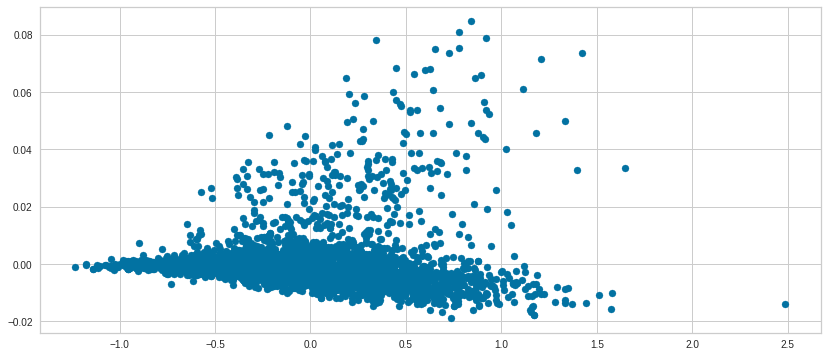

In [ ]:
print("pourcentage de variance expliquée = {}".format(sum(article1_bert_pca.explained_variance_ratio_)))
plot_reduced_data(article1_bert_pca_matrix)

<h4> 2. TSNE </h4>

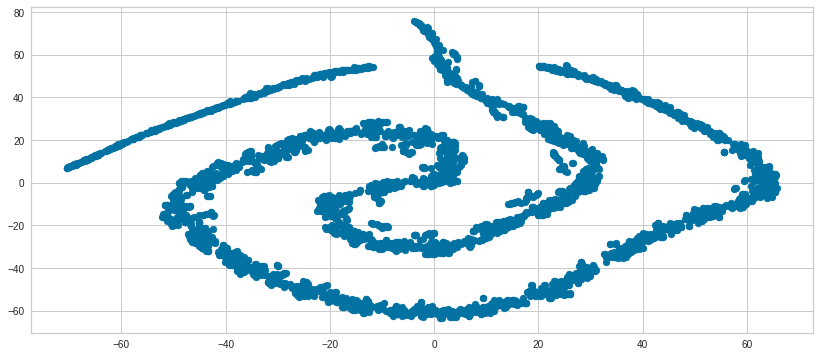

In [ ]:
plot_reduced_data(article1_bert_tsne)

<h4> 3 . UMAP </h4>

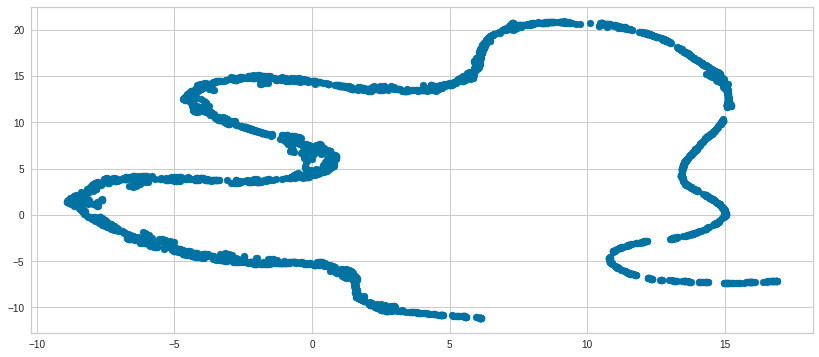

In [ ]:
plot_reduced_data(article1_bert_umap)

<h4> 4 . Auto-encoder </h4>

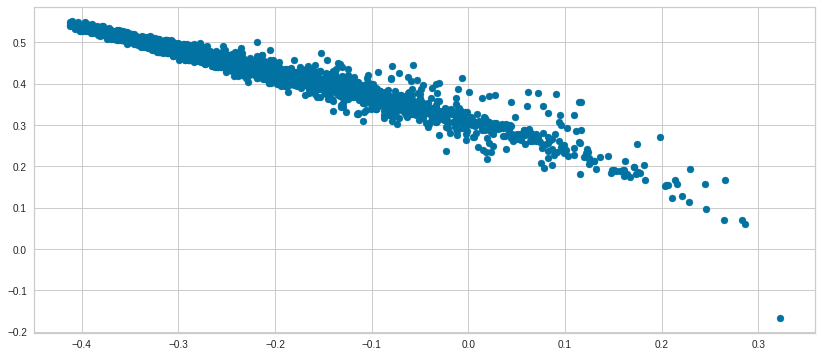

In [ ]:
plot_reduced_data(article1_bert_autoencoder_matrix)

<h2> Application du clustering sur les données réduites </h2>

<h3> ACP Suivi des méthodes de clustering </h3>

In [ ]:
article1_bert_pca_kmeans,article1_bert_pca_cah,article1_bert_pca_hdbscan,article1_bert_pca_spectral = clustering_on_reduced_data(article1_bert_pca_matrix,4)

<h4> ACP Suivi de k-means </h4>

Nombre de clusters prédit est : 4




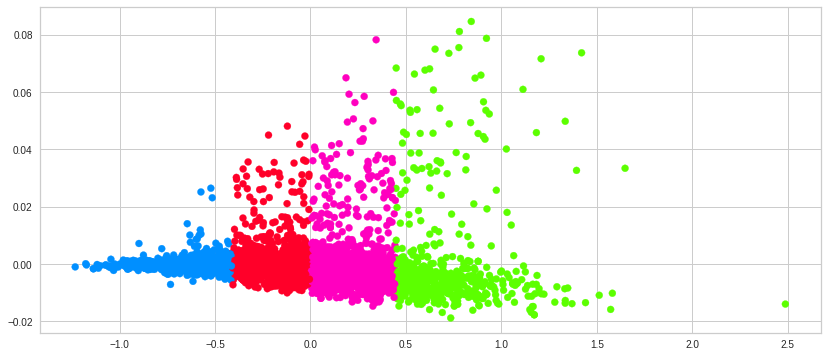

In [ ]:
eval_clustering_2D_nlp(article1_bert_pca_matrix,article1_bert_pca_kmeans.labels_)

Nous observons la formation de clusters;

<h4> ACP Suivi de CAH </h4>

Nombre de clusters prédit est : 4




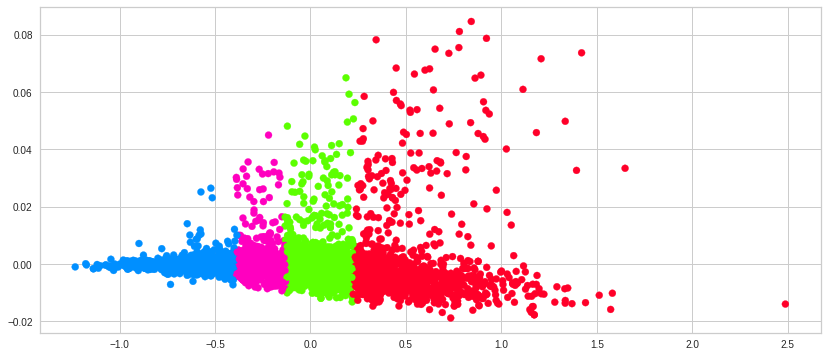

In [ ]:
eval_clustering_2D_nlp(article1_bert_pca_matrix,article1_bert_pca_cah.labels_)


<h4> ACP suivi hdbscan </h4>

Nombre de clusters prédit est : 137




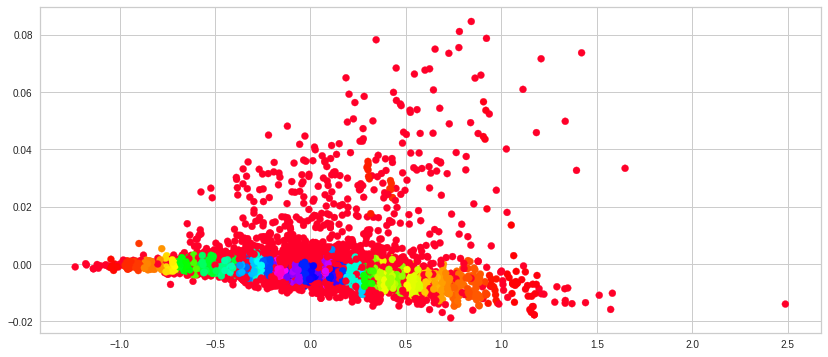

In [ ]:
eval_clustering_2D_nlp(article1_bert_pca_matrix,article1_bert_pca_hdbscan.labels_)


<h4> ACP Suivi de Spectral Clustering</h4>

Nombre de clusters prédit est : 4




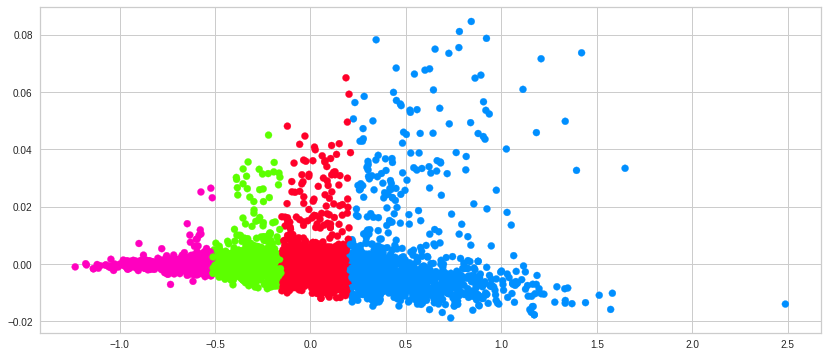

In [ ]:
eval_clustering_2D_nlp(article1_bert_pca_matrix,article1_bert_pca_spectral.labels_)


<h3> TSNE Suivi des méthodes de clustering </h3>

In [ ]:
article1_bert_tsne_kmeans,article1_bert_tsne_cah,article1_bert_tsne_hdbscan,article1_bert_tsne_spectral = clustering_on_reduced_data(article1_bert_tsne,4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



<h3> TSNE suivi de K-means </h3>

Nombre de clusters prédit est : 4




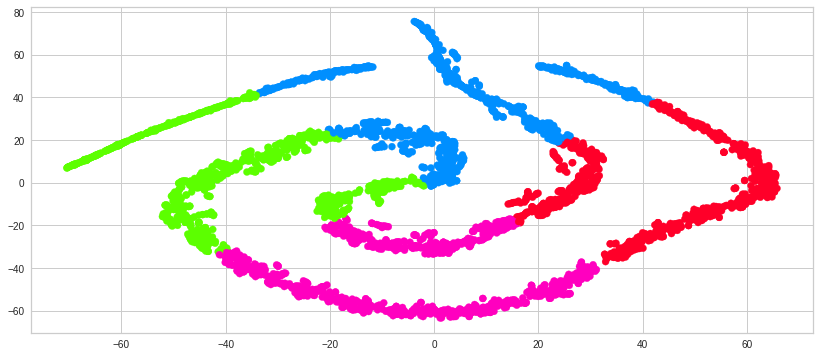

In [ ]:
eval_clustering_2D_nlp(article1_bert_tsne,article1_bert_tsne_kmeans.labels_)

<h3> TSNE suivi de CAH </h3>

Nombre de clusters prédit est : 4




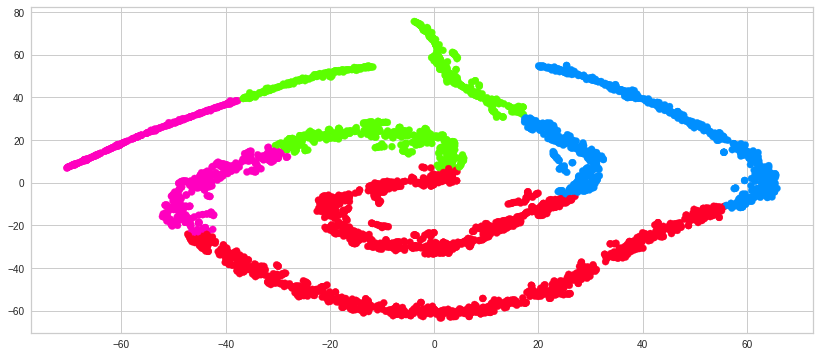

In [ ]:
eval_clustering_2D_nlp(article1_bert_tsne,article1_bert_tsne_cah.labels_)

<h3> TSNE Suivi de HDBSCAN </h3>

Nombre de clusters prédit est : 104




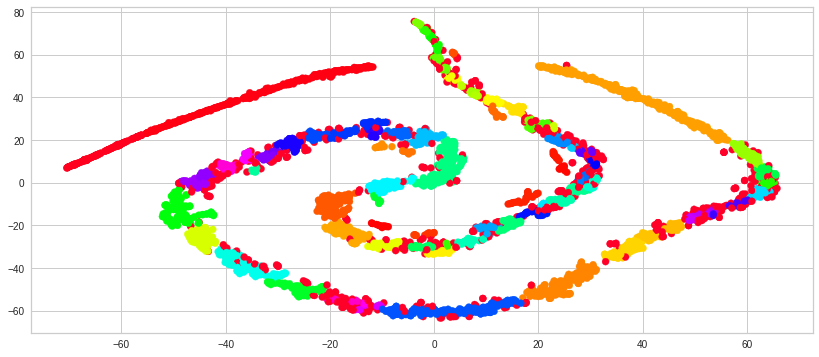

In [ ]:
eval_clustering_2D_nlp(article1_bert_tsne,article1_bert_tsne_hdbscan.labels_)

<h3> TSNE Suivi de Spectral clustering </h3>

Nombre de clusters prédit est : 4




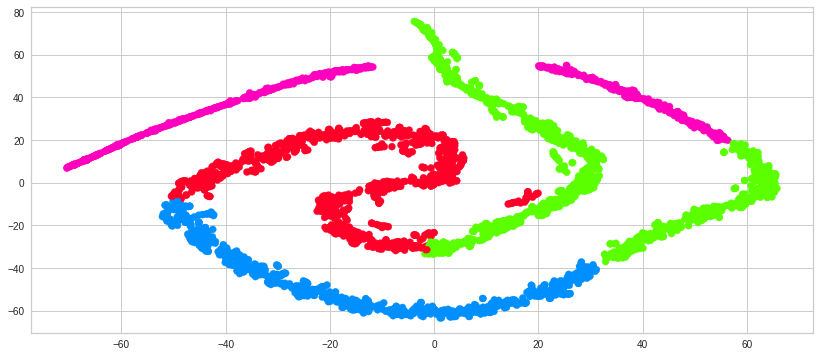

In [ ]:
eval_clustering_2D_nlp(article1_bert_tsne,article1_bert_tsne_spectral.labels_)

<h3> UMAP Suivi des méthodes de clustering </h3>

In [ ]:
article1_bert_umap_kmeans,article1_bert_umap_cah,article1_bert_umap_hdbscan,article1_bert_umap_spectral = clustering_on_reduced_data(article1_bert_umap,4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



<h3> UMAP Suivi de k-means </h3>

Nombre de clusters prédit est : 4




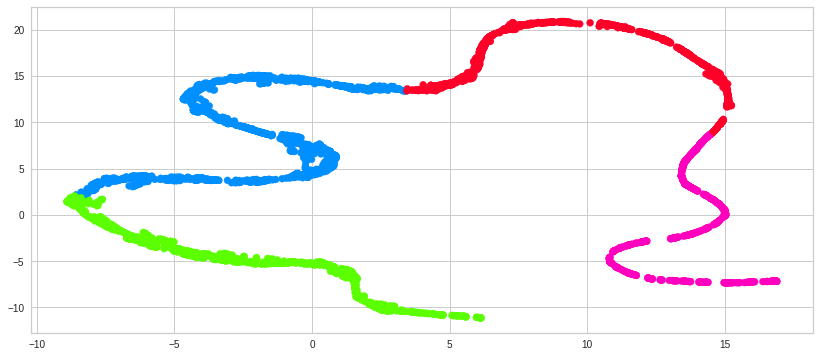

In [ ]:
eval_clustering_2D_nlp(article1_bert_umap,article1_bert_umap_kmeans.labels_)

<h3> UMAP suivi de CAH </h3>

Nombre de clusters prédit est : 4




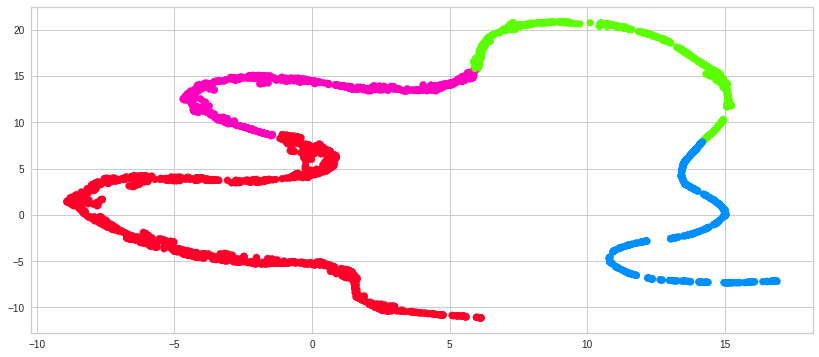

In [ ]:
eval_clustering_2D_nlp(article1_bert_umap,article1_bert_umap_cah.labels_)

<h3> UMAP Suivi de hdbscan </h3>

Nombre de clusters prédit est : 193




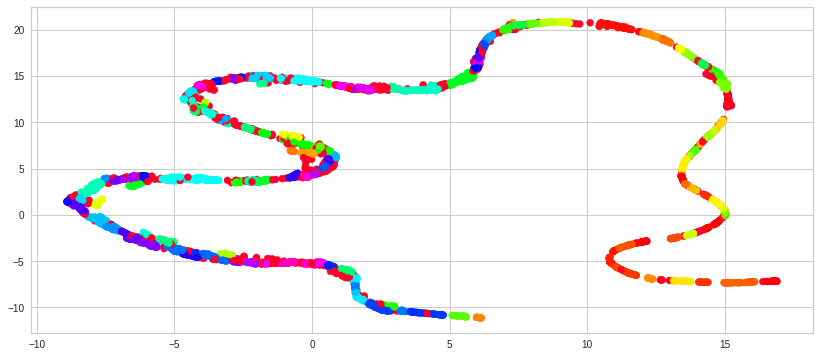

In [ ]:
eval_clustering_2D_nlp(article1_bert_umap,article1_bert_umap_hdbscan.labels_)

<h3> UMAP suivi de Spectral Clustering </h3>

Nombre de clusters prédit est : 4




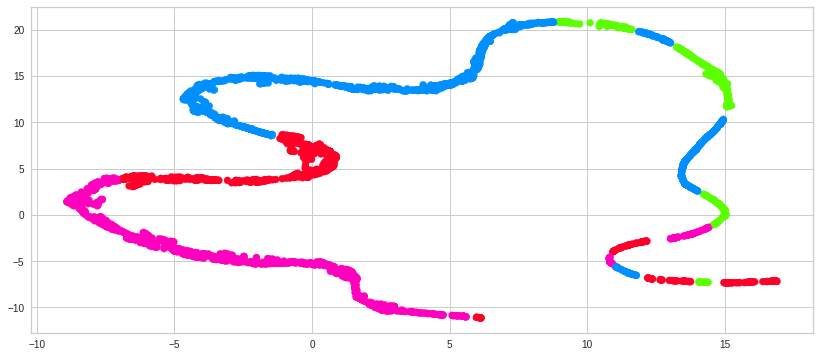

In [ ]:
eval_clustering_2D_nlp(article1_bert_umap,article1_bert_umap_spectral.labels_)

<h3> Autoencoders Suivi des méthodes de clustering </h3>

In [ ]:
article1_bert_autoencoders_kmeans,article1_bert_autoencoders_cah,article1_bert_autoencoders_hdbscan,article1_bert_autoencoders_spectral = clustering_on_reduced_data(article1_bert_autoencoder_matrix,4)

<h3> Autoencodeur suivi de Kmeans </h3>

Nombre de clusters prédit est : 4




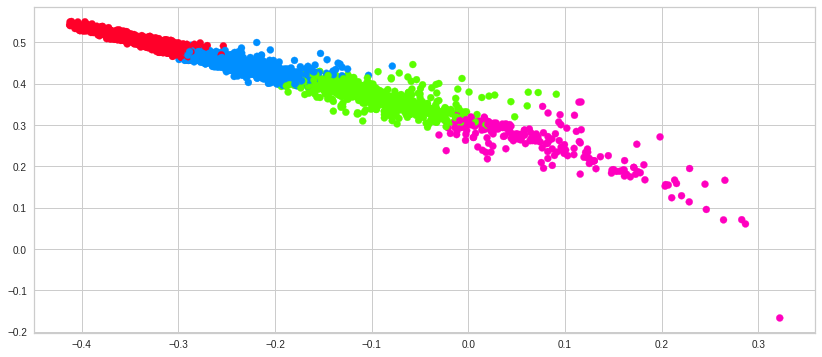

In [ ]:
eval_clustering_2D_nlp(article1_bert_autoencoder_matrix,article1_bert_autoencoders_kmeans.labels_)

<h3> Autoencodeur suivi de CAH </h3>

Nombre de clusters prédit est : 4




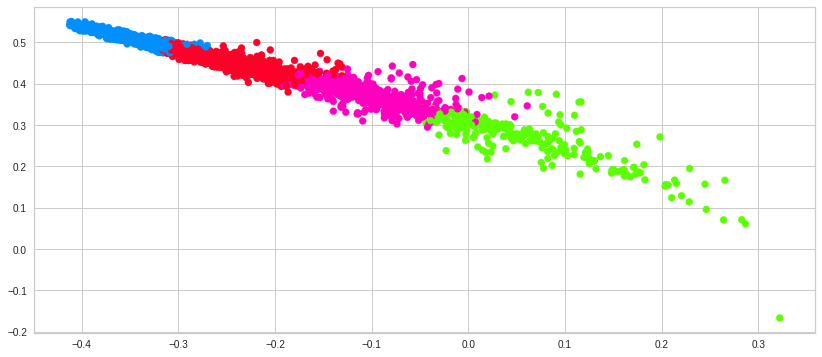

In [ ]:
eval_clustering_2D_nlp(article1_bert_autoencoder_matrix,article1_bert_autoencoders_cah.labels_)

<h3> Autoencodeur suivi de hdbscan </h3>

Nombre de clusters prédit est : 3




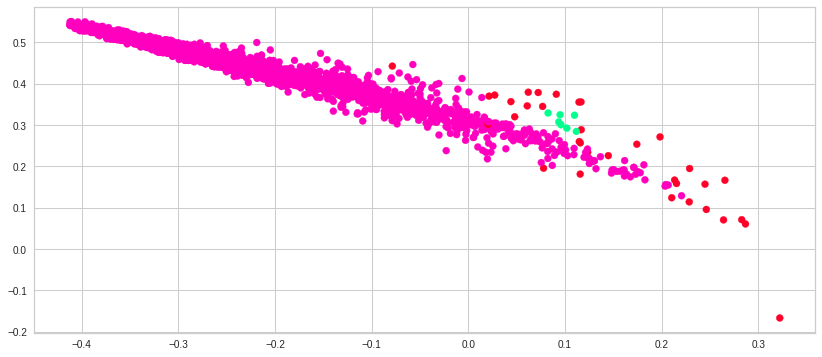

In [ ]:
eval_clustering_2D_nlp(article1_bert_autoencoder_matrix,article1_bert_autoencoders_hdbscan.labels_)

<h3> Autoencodeur suivi de spectral clustering </h3>

Nombre de clusters prédit est : 4




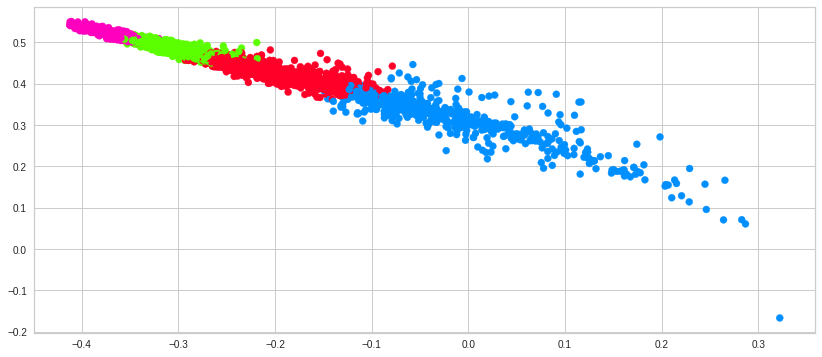

In [ ]:
eval_clustering_2D_nlp(article1_bert_autoencoder_matrix,article1_bert_autoencoders_spectral.labels_)

#<h1> Partie 2: UE Apprentissage et factorisation matricielle </h1>

#Factorial and Reduced K-means

###<h3> Installation des packages R nécessaire </h3>

In [ ]:
!pip install rpy2

In [ ]:
import rpy2.robjects.numpy2ri

In [ ]:
rpy2.robjects.numpy2ri.activate()

In [ ]:
from rpy2.robjects.packages import importr

In [ ]:
utils = importr('utils')

In [ ]:
utils.install_packages('FCPS',repos="https://cloud.r-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘sp’, ‘pracma’, ‘reshape2’, ‘RcppArmadillo’, ‘mclust’, ‘DataVisualizations’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fd0494cd780> [RTYPES.NILSXP]

In [ ]:
utils.install_packages('clustrd',repos="https://cloud.r-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘RcppEigen’, ‘modeltools’, ‘DEoptimR’, ‘RSpectra’, ‘reshape’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘rARPACK’, ‘corpcor’, ‘GGally’, ‘fpc’, ‘ggrepel’, ‘ca’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/RcppEigen_0.3.3.9.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1633360 bytes (1.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fd0494cd780> [RTYPES.NILSXP]

In [ ]:
utils.install_packages('fastcluster',repos="https://cloud.r-project.org")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/fastcluster_1.2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 207483 bytes (202 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fd0494cd780> [RTYPES.NILSXP]

In [ ]:
base = importr('base')
fcps = importr('FCPS')

#<h2> 1 - Données non labélisée </h2>

###Article 1

####Reduced K-means

In [ ]:
article1_bert_representation = np.array(article1_bert_representation)

In [ ]:
article1_ReducedK_means = fcps.TandemClustering(article1_bert_representation, 4, Type='Reduced', PlotIt=False, ndim=2)


R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



  |======================================================================| 100%

In [ ]:
# Label Predit
article1_ReducedK_means_pred_labels = article1_ReducedK_means[0]
# Récuperer les deux premieres composantes principales
article1_ReducedK_means_reduced = article1_ReducedK_means[1][0]

Nombre de clusters prédit est : 4




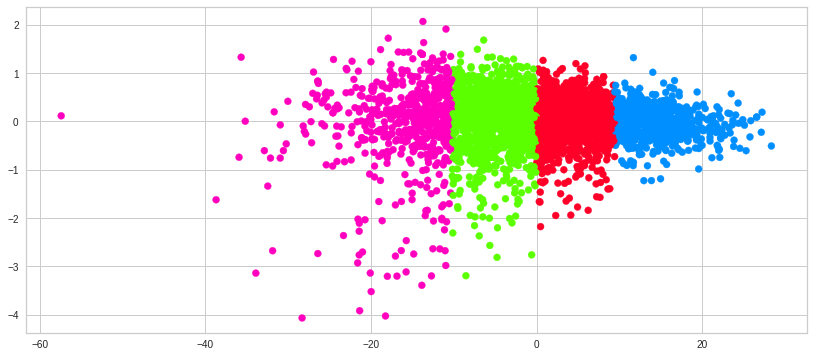

In [ ]:
eval_clustering_2D_nlp(article1_ReducedK_means_reduced,article1_ReducedK_means_pred_labels)

####Factorial K-means

In [ ]:
article1_FactorialK_means=fcps.TandemClustering(article1_bert_representation,Type='Factorial',ClusterNo=4)

  |======================================================================| 100%

In [ ]:
# Label Predit
article1_FactorialK_means_pred_labels = article1_FactorialK_means[0]
# Récuperer les deux premieres composantes principales
article1_FactorialK_means_reduced = article1_FactorialK_means[1][0]

Nombre de clusters prédit est : 4




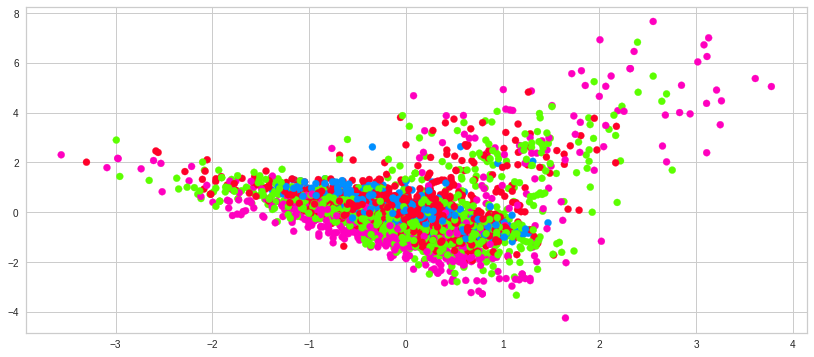

In [ ]:
eval_clustering_2D_nlp(article1_FactorialK_means_reduced,article1_FactorialK_means_pred_labels)

#DCN et DKN

In [ ]:
import os
import math
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.cluster import KMeans
from tqdm import tqdm

"""
  Credits:
    This code is based on the implementation provided by Maziar Moradi Fard and Thibaut Thoneta
    Available in: https://github.com/MaziarMF/deep-k-means
"""

TF_FLOAT_TYPE = tf.float32

tf.disable_eager_execution()

def fc_layers(input, specs):
    [dimensions, activations, names] = specs
    for dimension, activation, name in zip(dimensions, activations, names):
        input = tf.layers.dense(inputs=input, units=dimension, activation=activation, name=name, reuse=tf.AUTO_REUSE)
    return input

def autoencoder(input, specs):
    [dimensions, activations, names] = specs
    mid_ind = int(len(dimensions)/2)

    # Encoder
    embedding = fc_layers(input, [dimensions[:mid_ind], activations[:mid_ind], names[:mid_ind]])
    # Decoder
    output = fc_layers(embedding, [dimensions[mid_ind:], activations[mid_ind:], names[mid_ind:]])

    return embedding, output

def f_func(x, y):
    return tf.reduce_sum(tf.square(x - y), axis=1)

def g_func(x, y):
    return tf.reduce_sum(tf.square(x - y), axis=1)

def next_batch(num, data):
    """
    Return a total of `num` random samples.
    """
    indices = np.arange(0, data.shape[0])
    np.random.shuffle(indices)
    indices = indices[:num]
    batch_data = np.asarray([data[i, :] for i in indices])

    return indices, batch_data


#######################################################
############### Deep Clustering Network ###############
#######################################################

class DcnCompGraph(object):
    """Computation graph for the Deep Clustering Network model proposed in:
        Yang, B., Fu, X., Sidiropoulos, N. D., & Hong, M. (2017). Towards K-means-friendly Spaces: Simultaneous Deep
        Learning and Clustering. In ICML '17 (pp. 3861–3870).
    This implementation is inspired by https://github.com/boyangumn/DCN
    """

    def __init__(self, ae_specs, n_clusters, batch_size, n_samples, val_lambda):
        input_size = ae_specs[0][-1]
        embedding_size = ae_specs[0][int((len(ae_specs[0]) - 1) / 2)]

        # Placeholder tensor for input data
        self.input = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=(batch_size, input_size))

        # Auto-encoder loss computations
        self.embedding, self.output = autoencoder(self.input, ae_specs)  # Get the auto-encoder's embedding and output
        rec_error = g_func(self.input, self.output)  # Reconstruction error based on distance g
        self.ae_loss = tf.reduce_mean(rec_error)

        # Clustering loss computations
        ## Tensor for cluster representatives
        minval_rep, maxval_rep = -1, 1
        self.cluster_rep = tf.Variable(tf.random_uniform([n_clusters, embedding_size],
                                                    minval=minval_rep, maxval=maxval_rep,
                                                    dtype=TF_FLOAT_TYPE), name='cluster_rep', dtype=TF_FLOAT_TYPE)

        ## Clustering assignments for all samples in the dataset
        initial_clustering_assign = tf.random_uniform(minval=0, maxval=n_clusters, dtype=tf.int32, shape=[n_samples])
        self.cluster_assign = tf.Variable(initial_clustering_assign, name='cluster_assign', dtype=tf.int32, trainable=False)

        ## Get the cluster representative corresponding to the cluster of each batch sample
        self.indices = tf.placeholder(dtype=tf.int32, shape=batch_size)  # Placeholder for sample indices in current batch
        batch_clust_rep = []
        for j in range(batch_size):
            k = self.cluster_assign[self.indices[j]]  # Clustering assignment for sample j in batch
            batch_clust_rep.append(self.cluster_rep[k, :])
        stack_batch_clust_rep = tf.stack(batch_clust_rep)

        ## Compute the k-means term
        clustering_error = f_func(self.embedding, stack_batch_clust_rep)

        # Compute the full loss combining the reconstruction error and k-means term
        self.ae_loss = tf.reduce_mean(rec_error)
        self.kmeans_loss = tf.reduce_mean(clustering_error)
        self.loss = self.ae_loss + val_lambda * self.kmeans_loss

        # The optimizer is defined to minimize this loss
        optimizer = tf.train.AdamOptimizer()
        self.pretrain_op = optimizer.minimize(self.ae_loss) # Pretrain the autoencoder before starting DCN
        self.train_op = optimizer.minimize(self.loss)

        # As it has been pointed out in the DCN paper, first the weights of the autoencoder shall be trained then the
        # assignments and cluster representatives. So far in the computation graph we have optimized the weights of the
        # autoencoder, now it's the time for the assignments and representatives.

        # Update the clustering assignments
        for j in range(batch_size):
            # Find which cluster representative is the closest to the current batch sample
            new_assign = tf.argmin(f_func(tf.reshape(self.embedding[j, :], (1, embedding_size)), self.cluster_rep),
                                   output_type=tf.int32)
            # Update the clustering assignment
            self.cluster_assign_update = tf.assign(self.cluster_assign[self.indices[j]], new_assign)

        # Update the cluster representatives
        ## Initialize the value of count
        initial_count = tf.constant(100.0, shape=[n_clusters])
        count = tf.Variable(initial_count, name='count', dtype=TF_FLOAT_TYPE, trainable=False)
        ## Update the cluster representatives according to Equation (8) in the DCN paper
        for j in range(batch_size):
            k = self.cluster_assign[self.indices[j]]  # Clustering assignment for sample j in batch
            self.count_update = tf.assign(count[k], count[k] + 1)  # Updated count for cluster assignments
            new_rep = self.cluster_rep[k] - (1 / count[k]) * (self.cluster_rep[k] - self.embedding[j])
            self.cluster_rep_update = tf.assign(self.cluster_rep[k], new_rep)

def DCN(data, n_clusters, n_components, n_pretrain_epochs=50, n_finetuning_epochs=50, lambda_=1.0, batch_size=256, seed=None, cpu=False):
    # Auto-encoder architecture
    input_size = data.shape[1]
    hidden_1_size = 500
    hidden_2_size = 500
    hidden_3_size = 2000
    embedding_size = n_components
    dimensions = [hidden_1_size, hidden_2_size, hidden_3_size, embedding_size, # Encoder layer dimensions
                  hidden_3_size, hidden_2_size, hidden_1_size, input_size] # Decoder layer dimensions
    activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu, None, # Encoder layer activations
                  tf.nn.relu, tf.nn.relu, tf.nn.relu, None] # Decoder layer activations
    names = ['enc_hidden_1', 'enc_hidden_2', 'enc_hidden_3', 'embedding', # Encoder layer names
            'dec_hidden_1', 'dec_hidden_2', 'dec_hidden_3', 'output'] # Decoder layer names

    n_samples = data.shape[0]
    n_batches = int(math.ceil(n_samples / batch_size)) # Number of mini-batches
    pretrain = True # Specify if DKM's autoencoder should be pretrained

    # Hardware specifications
    if cpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Run on CPU instead of GPU if batch_size is small
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)

    if seed is not None:
      tf.reset_default_graph()
      tf.set_random_seed(seed)
      np.random.seed(seed)

    cg = DcnCompGraph([dimensions, activations, names], n_clusters, batch_size, n_samples,
                      lambda_)

    # Run the computation graph
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
        # Initialization
        init = tf.global_variables_initializer()
        sess.run(init)

        # Pretrain if specified
        if pretrain:
            print("Starting autoencoder pretraining...")

            # Variables to save pretraining tensor content
            embeddings = np.zeros((n_samples, embedding_size), dtype=float)

            # First, pretrain the autoencoder
            ## Loop over epochs
            for _ in tqdm(range(n_pretrain_epochs)):

                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices_, data_batch = next_batch(batch_size, data)

                    # Run the computation graph until pretrain_op (only on autoencoder) on the data batch
                    _, embedding_, ae_loss_ = sess.run((cg.pretrain_op, cg.embedding, cg.ae_loss),
                                                       feed_dict={cg.input: data_batch})

                    # Save the embeddings for batch samples
                    for j in range(len(indices_)):
                        embeddings[indices_[j], :] = embedding_[j, :]

            # Second, run k-means++ on the pretrained embeddings
            print("Running k-means on the learned embeddings...")
            kmeans_model = KMeans(n_clusters=n_clusters, init="k-means++").fit(embeddings)

            # The cluster centers are used to initialize the cluster representatives in DCN
            sess.run(tf.assign(cg.cluster_rep, kmeans_model.cluster_centers_))

            # The clustering assignments are used to initialize the clustering assignments in DCN
            sess.run(tf.assign(cg.cluster_assign, kmeans_model.labels_))

        # Train the full DCN model
        print("Starting DCN training...")
        ## Loop over epochs
        for epoch in tqdm(range(n_finetuning_epochs)):
            # print("Training step: epoch {}".format(epoch))

            # Loop over the samples
            for _ in range(n_batches):
                # Fetch a random data batch of the specified size
                indices_, data_batch = next_batch(batch_size, data)

                # Run the computation graph on the data batch
                _, _, _, _, loss_, cluster_assign_, ae_loss_, kmeans_loss_ =\
                    sess.run((cg.train_op, cg.cluster_assign_update, cg.count_update, cg.cluster_rep_update, cg.loss,
                              cg.cluster_assign, cg.ae_loss, cg.kmeans_loss),
                             feed_dict={cg.input: data_batch, cg.indices: indices_})
        
        embeddings = np.zeros((n_samples, embedding_size), dtype=float)
        for _ in range(n_batches):
            # Fetch a random data batch of the specified size
            indices_, data_batch = next_batch(batch_size, data)

            # Run the computation graph on the data batch
            _, _, embeddings_, _, _, loss_, cluster_assign_, ae_loss_, kmeans_loss_ =\
                sess.run((cg.train_op, cg.cluster_assign_update, cg.embedding, cg.count_update, cg.cluster_rep_update, cg.loss,
                          cg.cluster_assign, cg.ae_loss, cg.kmeans_loss),
                          feed_dict={cg.input: data_batch, cg.indices: indices_})

            for j in range(len(indices_)):
                embeddings[indices_[j], :] = embeddings_[j, :]
                
    return embeddings, cluster_assign_


#######################################################
##################### Deep K-means ####################
#######################################################

class DkmCompGraph(object):
    """Computation graph for Deep K-Means
    """

    def __init__(self, ae_specs, n_clusters, val_lambda):
        input_size = ae_specs[0][-1]
        embedding_size = ae_specs[0][int((len(ae_specs[0])-1)/2)]

        # Placeholder tensor for input data
        self.input = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=(None, input_size))

        # Auto-encoder loss computations
        self.embedding, self.output = autoencoder(self.input, ae_specs)  # Get the auto-encoder's embedding and output
        rec_error = g_func(self.input, self.output)  # Reconstruction error based on distance g

        # k-Means loss computations
        ## Tensor for cluster representatives
        minval_rep, maxval_rep = -1, 1
        self.cluster_rep = tf.Variable(tf.random_uniform([n_clusters, embedding_size],
                                                    minval=minval_rep, maxval=maxval_rep,
                                                    dtype=TF_FLOAT_TYPE), name='cluster_rep', dtype=TF_FLOAT_TYPE)

        ## First, compute the distance f between the embedding and each cluster representative
        list_dist = []
        for i in range(0, n_clusters):
            dist = f_func(self.embedding, tf.reshape(self.cluster_rep[i, :], (1, embedding_size)))
            list_dist.append(dist)
        self.stack_dist = tf.stack(list_dist)

        ## Second, find the minimum squared distance for softmax normalization
        min_dist = tf.reduce_min(list_dist, axis=0)

        ## Third, compute exponentials shifted with min_dist to avoid underflow (0/0) issues in softmaxes
        self.alpha = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=())  # Placeholder tensor for alpha
        list_exp = []
        for i in range(n_clusters):
            exp = tf.exp(-self.alpha * (self.stack_dist[i] - min_dist))
            list_exp.append(exp)
        stack_exp = tf.stack(list_exp)
        sum_exponentials = tf.reduce_sum(stack_exp, axis=0)

        ## Fourth, compute softmaxes and the embedding/representative distances weighted by softmax
        list_softmax = []
        list_weighted_dist = []
        for j in range(n_clusters):
            softmax = stack_exp[j] / sum_exponentials
            weighted_dist = self.stack_dist[j] * softmax
            list_softmax.append(softmax)
            list_weighted_dist.append(weighted_dist)
        stack_weighted_dist = tf.stack(list_weighted_dist)

        # Compute the full loss combining the reconstruction error and k-means term
        self.ae_loss = tf.reduce_mean(rec_error)
        self.kmeans_loss = tf.reduce_mean(tf.reduce_sum(stack_weighted_dist, axis=0))
        self.loss = self.ae_loss + val_lambda * self.kmeans_loss

        # The optimizer is defined to minimize this loss
        optimizer = tf.train.AdamOptimizer()
        self.pretrain_op = optimizer.minimize(self.ae_loss) # Pretrain the autoencoder before starting DKM
        self.train_op = optimizer.minimize(self.loss) # Train the whole DKM model

def DKM(data, n_clusters, n_components, n_pretrain_epochs=50, n_finetuning_epochs=5, lambda_=1.0, batch_size=256, seed=None, cpu=False):
    """
        The final number of finetuning epochs is n_finetuning_epochs * 20 if pretrain and n_finetuning_epochs * 40 if annealing
    """
    # Auto-encoder architecture
    input_size = data.shape[1]
    hidden_1_size = 500
    hidden_2_size = 500
    hidden_3_size = 2000
    embedding_size = n_components
    dimensions = [hidden_1_size, hidden_2_size, hidden_3_size, embedding_size, # Encoder layer dimensions
                  hidden_3_size, hidden_2_size, hidden_1_size, input_size] # Decoder layer dimensions
    activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu, None, # Encoder layer activations
                  tf.nn.relu, tf.nn.relu, tf.nn.relu, None] # Decoder layer activations
    names = ['enc_hidden_1', 'enc_hidden_2', 'enc_hidden_3', 'embedding', # Encoder layer names
            'dec_hidden_1', 'dec_hidden_2', 'dec_hidden_3', 'output'] # Decoder layer names

    n_samples = data.shape[0]
    n_batches = int(math.ceil(n_samples / batch_size)) # Number of mini-batches
    pretrain = True # Specify if DKM's autoencoder should be pretrained
    annealing = False # Specify if annealing should be used

    # Define the alpha scheme depending on if the approach includes annealing/pretraining
    if annealing and not pretrain:
        constant_value = 1  # specs.embedding_size # Used to modify the range of the alpha scheme
        max_n = 40  # Number of alpha values to consider
        alphas = np.zeros(max_n, dtype=float)
        alphas[0] = 0.1
        for i in range(1, max_n):
            alphas[i] = (2 ** (1 / (np.log(i + 1)) ** 2)) * alphas[i - 1]
        alphas = alphas / constant_value
    elif not annealing and pretrain:
        constant_value = 1  # specs.embedding_size # Used to modify the range of the alpha scheme
        max_n = 20  # Number of alpha values to consider (constant values are used here)
        alphas = 1000*np.ones(max_n, dtype=float) # alpha is constant
        alphas = alphas / constant_value
    else:
        raise Exception("Run with either annealing (-a) or pretraining (-p), but not both.")

    # Hardware specifications
    if cpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Run on CPU instead of GPU if batch_size is small

    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)
    config = tf.ConfigProto(gpu_options=gpu_options)

    if seed is not None:
      tf.reset_default_graph()
      tf.set_random_seed(seed)
      np.random.seed(seed)
      
    # Define the computation graph for DKM
    cg = DkmCompGraph([dimensions, activations, names], n_clusters, lambda_)

    # Run the computation graph
    with tf.Session(config=config) as sess:
        # Initialization
        init = tf.global_variables_initializer()
        sess.run(init)

        # Variables to save tensor content
        distances = np.zeros((n_clusters, n_samples))

        # Pretrain if specified
        if pretrain:
            print("Starting autoencoder pretraining...")

            # Variables to save pretraining tensor content
            embeddings = np.zeros((n_samples, embedding_size), dtype=float)

            # First, pretrain the autoencoder
            ## Loop over epochs
            for _ in tqdm(range(n_pretrain_epochs)):
                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices, data_batch = next_batch(batch_size, data)

                    # Run the computation graph until pretrain_op (only on autoencoder) on the data batch
                    _, embedding_, ae_loss_ = sess.run((cg.pretrain_op, cg.embedding, cg.ae_loss),
                                                        feed_dict={cg.input: data_batch})

                    # Save the embeddings for batch samples
                    for j in range(len(indices)):
                        embeddings[indices[j], :] = embedding_[j, :]

            # Second, run k-means++ on the pretrained embeddings
            print("Running k-means on the learned embeddings...")
            kmeans_model = KMeans(n_clusters=n_clusters, init="k-means++").fit(embeddings)

            # The cluster centers are used to initialize the cluster representatives in DKM
            sess.run(tf.assign(cg.cluster_rep, kmeans_model.cluster_centers_))

        # Train the full DKM model
        if (len(alphas) > 0):
            print("Starting DKM training...")
        ## Loop over alpha (inverse temperature), from small to large values
        for k in tqdm(range(len(alphas))):
            # Loop over epochs per alpha
            for _ in range(n_finetuning_epochs):
                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices, data_batch = next_batch(batch_size, data)

                    # Run the computation graph on the data batch
                    _, loss_, stack_dist_, cluster_rep_, ae_loss_, kmeans_loss_ =\
                        sess.run((cg.train_op, cg.loss, cg.stack_dist, cg.cluster_rep, cg.ae_loss, cg.kmeans_loss),
                                  feed_dict={cg.input: data_batch, cg.alpha: alphas[k]})

                    # Save the distances for batch samples
                    for j in range(len(indices)):
                        distances[:, indices[j]] = stack_dist_[:, j]

        _, loss_, X_reduced, stack_dist_, cluster_rep_, ae_loss_, kmeans_loss_ =\
        sess.run((cg.train_op, cg.loss, cg.embedding, cg.stack_dist, cg.cluster_rep, cg.ae_loss, cg.kmeans_loss),
                  feed_dict={cg.input: data, cg.alpha: alphas[k]})

        distances = stack_dist_

        # Infer cluster assignments for all samples
        cluster_assign = np.zeros((n_samples), dtype=float)
        for i in range(n_samples):
            index_closest_cluster = np.argmin(distances[:, i])
            cluster_assign[i] = index_closest_cluster
        cluster_assign = cluster_assign.astype(np.int64)

    return X_reduced, cluster_assign

#Données non labelisée

##Article1

###Deep K-means

In [ ]:
deep_kmeans_article1_bbc = DKM(article1_bert_representation,4,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [00:09<00:00,  5.05it/s]


Running k-means on the learned embeddings...
Starting DKM training...


100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


In [ ]:
article1_deep_kmeans_labels = deep_kmeans_article1_bbc[1]
article1_deep_kmeans_reduced = deep_kmeans_article1_bbc[0]

Nombre de clusters prédit est : 4




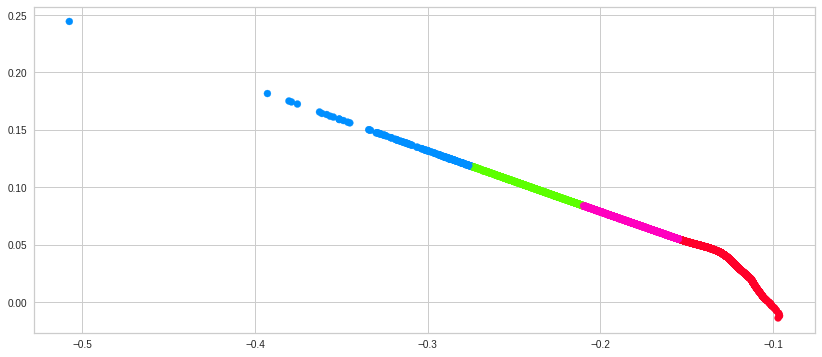

In [ ]:
eval_clustering_2D_nlp(article1_deep_kmeans_reduced,article1_deep_kmeans_labels)

###<h4>2 - Factorial k-means </h4>

In [ ]:
deep_kmeans_article1_bbc = DCN(article1_bert_representation,4,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [00:09<00:00,  5.10it/s]


Running k-means on the learned embeddings...
Starting DCN training...


100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


In [ ]:
article1_deep_clustering_labels = deep_kmeans_article1_bbc[1]
article1_deep_clustering_reduced = deep_kmeans_article1_bbc[0]

Nombre de clusters prédit est : 4




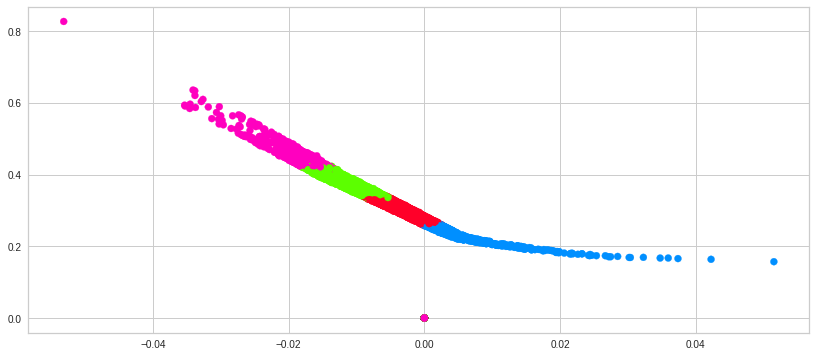

In [ ]:
eval_clustering_2D_nlp(article1_deep_clustering_reduced,article1_deep_clustering_labels)